<b>Max norm constraints</b> is another form of regularization. It's purpose is to enforce an absolute upper bound on the magnitude of the weight vector for every neuron. It then use projected gradient descent to enforce the constraint. In practice, after update parameters as normal, it then enforces the constraint by clamping the weight vector $\vec{w}$ of every neuron to satisfy ${\lVert \vec{w} \rVert}_2 < c$ with c is the order of 3 or 4.

Source: https://stats.stackexchange.com/questions/257996/what-is-maxnorm-constraint-how-is-it-useful-in-convolutional-neural-networks

There are different vetor norms to use. In <b>keras.contraints</b>, there are:

-  Maximum norm(max_norm): to force weights to have a magnitude at or below a given limit

- Non-negative norm (non_neg): to force weights to have a positive magnitude.

- Unit norm (unit_norm): to force weights to have a positive magnitude

- Min-Max norm (min_max_norm): to force weights to have a magnitude between a range

All of this project ideas belong to https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-neural-networks-with-weight-constraints-in-keras/

# Binary Classification Problem

In [16]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
from keras.layers import Dense
from keras.models import Sequential
from keras.constraints import unit_norm
from keras.constraints import min_max_norm
from keras.constraints import max_norm
from keras.constraints import non_neg

In [9]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

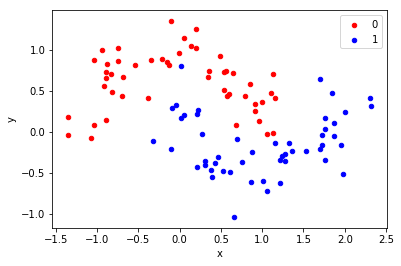

In [10]:
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

make_moons create a number of clusters which have moon shape in each class, which is non seperatable by a line

With as little as 100 data points, our NN model will prone to overfit, which is a perfect example for our normalization method

## Overfit Multilayer Perceptron

In [11]:
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [12]:
def MP_model():
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [14]:
# fit model
model = MP_model()
history = model.fit(trainX, trainy, validation_data=(testX, testy), 
                    epochs=4000, verbose=0)
# evaluate
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


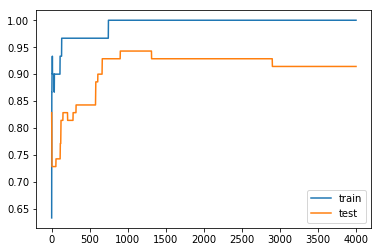

In [29]:
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.savefig("none_norm.jpeg")
pyplot.show()

## Overfit Multilayer Perceptron with Weight Constraint

In [17]:
def MP_model_unit_norm():
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu'
                   , kernel_constraint=unit_norm()))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    return model
def MP_model_min_max_norm():
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu'
                   , kernel_constraint=min_max_norm()))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    return model
def MP_model_max_norm():
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu'
                   , kernel_constraint=max_norm()))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    return model


In [18]:
# define models
unit_model = MP_model_unit_norm()
min_max_model = MP_model_min_max_norm()
max_model = MP_model_max_norm()

# fit
history_unit = unit_model.fit(trainX, trainy, 
                         validation_data=(testX, testy), 
                         epochs=4000, verbose=0)
history_min_max = min_max_model.fit(trainX, trainy, 
                         validation_data=(testX, testy), 
                         epochs=4000, verbose=0)
history_max= max_model.fit(trainX, trainy, 
                         validation_data=(testX, testy), 
                         epochs=4000, verbose=0)

In [22]:
# evaluate
_, train_acc_unit = unit_model.evaluate(trainX, trainy, verbose=0)
_, test_acc_unit= unit_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_unit, test_acc_unit))

Train: 1.000, Test: 0.943


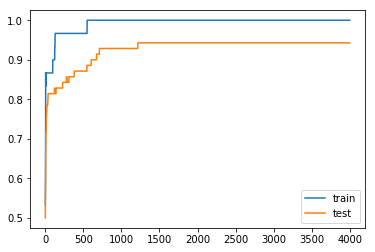

In [30]:
pyplot.plot(history_unit.history['acc'], label='train')
pyplot.plot(history_unit.history['val_acc'], label='test')
pyplot.legend()
pyplot.savefig("unit_norm.jpeg")
pyplot.show()

In [24]:
# evaluate
_, train_acc_min_max = min_max_model.evaluate(trainX, trainy, verbose=0)
_, test_acc_min_max= min_max_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_min_max, test_acc_min_max))

Train: 1.000, Test: 0.914


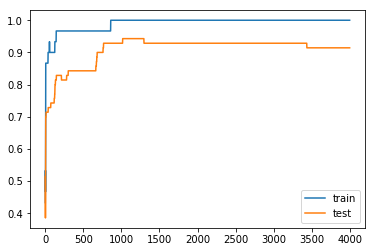

In [32]:
pyplot.plot(history_min_max.history['acc'], label='train')
pyplot.plot(history_min_max.history['val_acc'], label='test')
pyplot.legend()
pyplot.savefig("min_max_norm.jpeg")
pyplot.show()

In [26]:
# evaluate
_, train_acc_max = max_model.evaluate(trainX, trainy, verbose=0)
_, test_acc_max= max_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_max, test_acc_max))

Train: 1.000, Test: 0.914


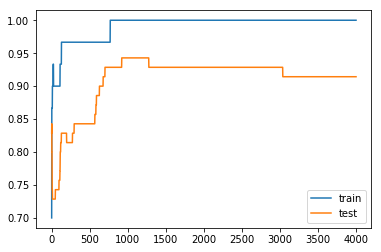

In [33]:
pyplot.plot(history_max.history['acc'], label='train')
pyplot.plot(history_max.history['val_acc'], label='test')
pyplot.legend()
pyplot.savefig("max_norm.jpeg")
pyplot.show()

# Later extensions

- Visualize and reporting weight norm: update the weight then demonstrate that the constraint help to minimize the magnitude
- Put constrain on ouput layer: Update the example to add constraint to the output layer of the model and compare result
- Put constrain on Bias
- Repeat evaluation: repeat multiple time then report the mean to show the effect